In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Taken from 
"Grovers Algorithm — Programming on Quantum Computers — Coding with Qiskit S2E3" Located at https://www.youtube.com/watch?v=0RPFWZj7Jm0 by Qiskit YouTube channel

In [2]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [3]:
def the_oracle(my_input):
    winner=7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [4]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print("Winner found at index %i"%index)
        print("%i calls to the Oracle used"%(index+1))
        break

Winner found at index 9
10 calls to the Oracle used


Order scales at the order O(N) in classical computing for Grover's Algorithm
Order scales at the order O(sqrt(N)) in quantum computing for G.A.

Controlled-Z Gate |11> -> -|11> flips the sign of 11 state, Unitary Matrix
Amplitude Amplification: Reflection Operator (Grover's Diffusion Operator)

Grover's Iterate: [Oracle] + [Reflection]

In [6]:
from qiskit import*
import matplotlib.pyplot as plt
import numpy as np

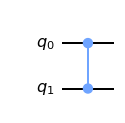

In [7]:
#define the oracle circuit
oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

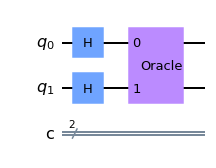

In [9]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

In [11]:
job = execute(grover_circ,backend)
result = job.result()

In [12]:
sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

Next step: P(x) = <x|c* c|x> = |c|^2 
Have to multiply each element of the statevector by its Hermitian conjugate in order to get back the probability of its basis state.

|11> =|w> = [0
             0
             0
             1]
      |s> = [1
             1
             1
             1] * 1/2 (normalized by 1/2)
      |s'> = [1
              1
              1
              0] * 1/sqrt(3) (normalized)
      
      |s> -> {Oracle} -> [1
                          1
                          1
                          -1] *1/2
      |s><s|-1
      
 Combining these operators brings us closer to winning operator W, the winning vector.

In [13]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

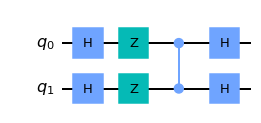

In [14]:
reflection.draw()

In [15]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1], [0,1])

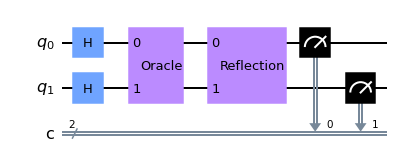

In [16]:
grover_circ.draw()

In [17]:
job=execute(grover_circ,backend,shots=1)
result=job.result()
result.get_counts()

{'11': 1}